# 1D Jump Processes [[src](https://personal.ntu.edu.sg/nprivault/MA5182/stochastic-calculus-jump-processes.pdf)]
A **jump process** $N_t$ is stochastic process whose path is characterized by discrete jumps/changes in value at random interarrival times. Their SDEs produce non-continuous paths as a result of the jumps. Below, we'll explore the poisson process and its extensions which falls under the larger category of renewal processes.

### Poisson Process
The **Poisson process** with rate parameter $\lambda$ is a jump process driven by exponentially distributed interarrival times with parameter $\lambda$. The following are properties of the poisson process: 
- $N_{t_1}-N_{t_0},N_{t_n}-N_{t_{n-1}}$ are mutually independent (Independent increments)
- $N_{t+h} - N_{s+h}$ is identically distributed $\forall h>0, 0\leq s\leq t$ (Stationary increments)
- $\mathbb{P}(N_t-N_s=k)=e^{-(t-s)\lambda}\frac{((t-s)\lambda)^k}{k!},k\geq0$
- $\mathbb{E}[N_t-N_s]=Var[N_t-N_s]=\lambda (t-s)$
- $\mathbb{P}(N_{t+h}-N_t-k) \simeq h^k\frac{\lambda^k}{k!}, h\rightarrow 0, t>0$
- $\mathbb{P}(T_n=t)=\mathbb{P}(N_t=n)$ (pdf of the random arrival/jump times $T_n$) 
- $\mathbb{E}(T_n)=\frac{n}{\lambda}$ (Expected jump time)
- $\mathbb{P}(T_{k+1}-T_k\leq \tau)=1-\lambda e^{-\lambda\tau}$ (interarrival times)
- $\mathbb{E}(T_{k+1}-T_k)=\frac{1}{\lambda}$ (expected interarrival time)

The **index of dispersion** of the poisson process (the ratio of variance to mean) is 1. This is relevant in determining whether observed data can be modelled using a poisson process.

Further extensions/generalizations:
- Nonhomogeneous Poisson processes: For a time dependent intensity in the poisson process $\lambda_t$, $\mathbb{P}(N_t-N_s=k)=e^{-\int_s^t\lambda_u du}\frac{(-\int_s^t\lambda_u du)^k}{k!},k\geq0$. This applies to both a stochastic intensity and a deterministic intensity.
- A poisson process falls under a group called renewal processes that are counting processes of the form $N_t=\sum_{n\geq 1}𝟙_{[T_n,\infty)}(t)$ where the distribution of interarrival times $T_{k+1}-T_k$ define the properties of the counting process.

### Compensated Poisson Process
By the property that $\mathbb{E}(N_t)=\lambda t$, we can define a martingale $M_t=N_t-\lambda t$ known as the **compensated poisson process** with expectation 0. The increments are independent and **centered** around 0.

### Compound Poisson Process
The regular poisson process considers only unit jumps. **Compound poisson processes** extend this concept by introducing variable/random jump sizes:
\begin{equation*}
Y_t = \sum_{i=1}^{N_t}Z_i
\end{equation*}
where $N_t$ is a poisson process with rate parameter $\lambda$ and $Z_i$ iid random vairables with some arbitrary distribution.

It has the following properties:
- $\mathbb{E}(Y_t)=\lambda t\mathbb{E}(Z)$ (Expectation)
- $Var(Y_t)=\lambda t\mathbb{E}(|Z|^2)$ (Variance)
- It has stationary independent increments.

The process has an index of dispersion of $\frac{\mathbb{E}(|Z|^2)}{\mathbb{E}(Z)}$

### Compensated Compound Poisson Process
Given $Y_t$ a compound poisson process, its compensated form is simply $M_t:=Y_t-\lambda t\mathbb{E}(Z),t\geq 0$. Just like a regular compensated poisson process, it is a martingale ($\mathbb E(M_t)=0$).

### Stochastic integrals with jumps
Given a compound poisson process $Y_t$, we can infer that it evolves based on $dY_t=Z_{N_t}dN_t$. For a stochastic process $\phi_t$, the **stochastic integral** with respect to $Y_t$ is:
\begin{equation*}
\int_0^T\phi_t dY_t = \int_0^T\phi_t Z_{N_t}dN_t = \sum_{k=1}^{N_T}\phi_{T_k}Z_k
\end{equation*}

The stochastic integral has the following properties:
- $\mathbb{E}(\int_0^T\phi_{t^-}dY_t)=\lambda\mathbb{E}(Z)\mathbb{E}(\int_0^T\phi_{t^-}dt)$ (Expectation assuming $\mathbb{E}(\int_0^T|\phi_{t^-}|dt)<\infty$)
- $\mathbb{E}(\int_0^T\phi_{t^-}(dY_t-\lambda t\mathbb{E}(Z)dt))^2=\lambda\mathbb{E}(|Z|^2)\mathbb{E}(\int_0^T|\phi_{t^-}|^2dt)$ (Ito isometry on the martingale $Y_t-\lambda t\mathbb{E}(Z)$ assuming $\mathbb{E}(\int_0^T|\phi_{t^-}|^2dt)<\infty$)

where $t^-$ denotes the left limit of $t$

Given a jump diffusion process $X_t=\int_0^tu_tdW_t+\int_0^tv_tdt+Y_t$ with jump component driven by a compound poisson process $Y_t$, drift $v_t$ and diffusion $u_t$, we have the following **stochastic integral** for $\phi_t$:
\begin{equation*}
\int_0^T\phi_t dX_t = \int_0^T\phi_tu_tdW_t + \int_0^T\phi_tv_tdt + \int_0^T\phi_tdY_t
\end{equation*}
with the following ito isometry on the martingle $\int_0^Tu_tdW_t+dY_t-\lambda t\mathbb{E}(Z)$:
\begin{equation*}
\mathbb{E}\int_0^T\phi_{t^-}(u_tdW_t+dY_t-\lambda t\mathbb{E}(Z)dt)=\mathbb{E}(\int_0^T|\phi_{t^-}|^2|u_t|^2dt) + \lambda\mathbb{E}(|Z|^2)\mathbb{E}(\int_0^T|\phi_{t^-}|^2dt)
\end{equation*}

Generally, we have the following stochastic integral for $X_t=\int_0^tu_tdW_t+\int_0^tv_tdt+\int_0^t\eta_t dY_t$:
\begin{equation*}
\int_0^T\phi_t dX_t = \int_0^T\phi_tu_tdW_t + \int_0^T\phi_tv_tdt + \int_0^T\phi_t\eta_tdY_t
\end{equation*}

### Ito's formula with jumps
Ito's for a poisson process:
\begin{equation*}
df(N_t) = (f(N_t)-f(N_{t^-}))dN_t
\end{equation*}

Ito's for a compound poisson process:
\begin{equation*}
df(Y_t) = (f(Y_t)-f(Y_{t^-}))dN_t
\end{equation*}

Ito's for a jump diffusion process ($X_t=X_0+\int_0^tv_sds+\int_0^tu_sdW_s+\int_0^t\eta_sdY_s$)
\begin{equation*}
df(X_t)=(v_tf'(X_t)+\frac{|u_t|^2}{2}f''(X_t))dt+u_tf'(X_t)dW_t+ + (f(X_t)-f(X_{t^-}))dN_t
\end{equation*}

Multiplication table with jumps:
- $dtdt = dW_tdt = dtdW_t = dN_tdt = dtdN_t=dN_tdW_t=dW_tdN_t=0$
- $dW_tdW_t = dt$
- $dN_tdN_t = dN_t$


# Stochastic Optimal Control [[src](https://www.researchgate.net/profile/Mohamed_Mourad_Lafifi/post/Can_anyone_help_on_the_optimal_control_problems_of_financial_flows/attachment/59ef9e3db53d2fe8081afefe/AS%3A553079289454592%401508875786816/download/BOOK-Soner-Stochastic_optimal_control_in_finance.pdf)]

### Defining a stochastic optimal control problem
An optimal control problem has the following components:
- $Z(\cdot)$ the state process of the system that varies with time and is influenced by the control. It has dynamics described in terms of an ODE/PDE or SDE.
- $u(\cdot)$ the control process that is chosen at for every time step $t$
- $\mathcal{A}$ the space of possible controls.
- $J(Z(\cdot),u(\cdot))$ the objective which is an integral over time to be maximized or minimized.

The value function $v(t,x)$ is defined by $v(t,x)=\inf_{u\in\mathcal{A}_{t,x}}J$. There are two types of controls you can obtain after solving the optimal control problem: a feedforward control and a feedback control. 
- A **feedback form** solution updates in response to the current state of the system. This is also known as close loop control.
- A **feedforward form** solution computes the control in advance (assuming a particular path the state process will take) and does not depend on the current running state. This is also known as open loop control.

### Dynamic Programming Princple
Denote the state process driven by control $u$ and starting from $Z(t)=z$ by $Z_{t,z}^u(s)$. Similarly let $\mathcal{A}_{t,z}$ be the admissible controls given the initial conditions. Note that anything indexed by subscript $t$, $(...)_t$, denotes the value at time $t$ of $(...)$.

Suppose the following assumptions are satisfied:
- Given stopping time $\tau$, $\forall s\leq\tau,Z_{t,z}^u(s)=Z_{\tau,Z^{u}_{t,z}(\tau)}^u(s)$
- If $u^1(s)=u^2(s)\forall s\leq\tau$ then $\forall s\leq\tau,Z_{t,z}^{u^1}(s)=Z^{u^2}_{t,z}(s)$
- Concatenation of admissible controls is also admissible (i.e. $\in \mathcal{A}$)
- The value function $J$ has additive structure: i.e. $J(Z_{t,z},u(t)) =  \int_t^\tau L(s,u(s),Z_{t,z}^u(s))ds + G(Z_{\tau})$.

The **Dynamic Programming Principle (DPP)** (or Principle of Optimality) states that for any stopping time $\tau\geq t$, we have
\begin{equation*}
v(t,x) = \inf_{u\in\mathcal{A}_{t,z}}\mathbb{E}[\int_t^\tau Lds+v(\tau,Z_{t,z}^u(\tau))|\mathcal{F}_t]
\end{equation*}

In essence, it states that the value of an optimal control problem starting from time $t$ and state $z$ is equal to the value of optimally controlling the system up to $\tau$ and applying the value function again starting from the time $\tau$.

### Dynamic Programming equation:
If we let $\tau=t+h$ and $h\rightarrow 0$, then the dynamic programming principle becomes the **Dynamic programming equation** (DPE) (AKA the Hamilton Jacobi Bellman equation). This can be generally expressed in the form:
\begin{equation*}
0 = \inf_{u\in\mathcal{A}}[\frac{\partial v}{\partial t} + Hamiltonian]
\end{equation*}
where the hamiltonian can be derived from taking the limit of the DPP.

There are two approaches to using the DPE: the classical route of assuming smoothness (i.e. $\in\mathcal{C}^2$, doubly differentiable with continuous derivatives) in the value function then actually deriving it via PDE methods; and viscosity solutions which focuses on proving the existence of a unique stable optimal control (stability being important for numerical approximation).

#### DPE/HJB for Diffusions
Consider a state process where the control influences its drift and diffusion coefficients.
\begin{equation*}
dZ_t = \mu(t,Z_t,u_t)dt+\sigma(t,Z_t,u_t)dW_t
\end{equation*}

Suppose the conditions are satisfied such that we have the value function:
\begin{equation*}
v(t,x) = \inf_{u\in\mathcal{A}_{t,z}}\mathbb{E}[\int_t^{t+h} L(s, Z_s, u_s) ds+v(t+h,Z_{t+h})|\mathcal{F}_t]
\end{equation*}

As we take the limit $h\rightarrow 0$, we can expand the terms inside the expectation:
\begin{array}{rl}
\displaystyle \mathbb{E}[\int_t^{t+h} L(s, Z_s, u_s) ds+v(t+h,Z_{t+h})|\mathcal{F}_t] &= \displaystyle \mathbb{E}[\int_t^{t+h} L(s, Z_s, u_s) ds|\mathcal{F}_t]+\mathbb{E}[v(t+h,Z_{t+h})|\mathcal{F}_t]\\\\
\displaystyle \mathbb{E}[\int_t^{t+h} L(s, Z_s, u_s) ds|\mathcal{F}_t] &= L(t, Z_t, u_t)dt\\\\
\displaystyle \mathbb{E}[v(t+h,Z_{t+h})|\mathcal{F}_t] &= \displaystyle \mathbb{E}[v(t,Z_t)+dv(t,Z_t)|\mathcal{F}_t]\\\\
&= \displaystyle v(t,Z_t) + \mathbb{E}[\frac{\partial v}{\partial t}dt + \frac{\partial v}{\partial x}dZ_t + \frac{1}{2}\frac{\partial^2 v}{\partial x^2}(dZ_t)^2 + o(t)|\mathcal{F}_t] \text{ (By Taylor expansion)}\\\\
&= \displaystyle v(t,Z_t) + (\frac{\partial v}{\partial t} + \frac{\partial v}{\partial x}\mu(t,Z_t,u_t) + \frac{1}{2}\frac{\partial^2 v}{\partial x^2}\sigma(t,Z_t,u_t)^2)dt \text{ (By Ito calculus)}\\\\
\therefore \displaystyle \mathbb{E}[\int_t^{t+h} L(s, Z_s, u_s) ds+v(t+h,Z_{t+h})|\mathcal{F}_t] &= L(t, Z_t, u_t)dt + \displaystyle v(t,Z_t) + \frac{\partial v}{\partial t}dt + \frac{\partial v}{\partial x}\mu(t,Z_t,u_t)dt + \frac{1}{2}\frac{\partial^2 v}{\partial x^2}\sigma(t,Z_t,u_t)^2dt
\end{array}
Substituting back into the original equation and subtracting $v(t,x)$ from both sides:
\begin{equation*}
0 = \inf_{u\in\mathcal{A}_{t,z}}[L(t, Z_t, u_t)dt + \frac{\partial v}{\partial t}dt + \frac{\partial v}{\partial x}\mu(t,Z_t,u_t)dt + \frac{1}{2}\frac{\partial^2 v}{\partial x^2}\sigma(t,Z_t,u_t)^2dt]
\end{equation*}
Finally, dividing by $dt$:
\begin{equation*}
0 = \inf_{u\in\mathcal{A}_{t,z}}[L(t, Z_t, u_t) + \frac{\partial v}{\partial t} + \frac{\partial v}{\partial x}\mu(t,Z_t,u_t) + \frac{1}{2}\frac{\partial^2 v}{\partial x^2}\sigma(t,Z_t,u_t)^2]
\end{equation*}

If the state process $Z_t$ was a vector (and $v(t,x)$ a function of $t$ and a vector $x$), this would instead be:
\begin{equation*}
0 = \inf_{u \in\mathcal{A}_{t,z}}[L(t,Z_t,u_t) + \frac{\partial v}{\partial t} + (\nabla_xV)^T\mu(t,Z_t,u_t) + \frac{1}{2}Tr(\sigma^T(H_xV)\sigma)]
\end{equation*}
where $H_xV$ is the Hessian matrix of $V$ with respect to vector variable $x$ and $\nabla_x V$ is the gradient of $V$ with respect to vector variable $x$.

#### Classical approach
To explore an example of the classical approach using PDE methods and the assumption that the value function is smooth, we consider a basic linear quadratic regulator problem with a one dimensional state process. In the solution below, the PDE methods used include Ansatz and the Ricatti equation.

Basic LQR System:
\begin{array}{rl}
dZ_t &= u_t dt + \sigma dW_t, Z_0 = z \\\\
J(Z_t, u_t) &= \mathbb{E}[\int_0^\infty e^{-rt}(X_t^2+u_t^2)dt] \\\\
V(t,x) &= \inf_u J(Z_t,u_t)
\end{array}

HJB equation (Try deriving from DPP):
\begin{equation*}
0=\min_{u\in\mathbb{R}}[-rv+\frac{\partial v}{\partial x}u + \frac{1}{2}\sigma^2\frac{\partial^2 v}{\partial x^2} + x^2 + u^2]
\end{equation*}

Solution to the HJB:
\begin{array}{rl}
\displaystyle u &= \displaystyle-\frac{1}{2}\frac{\partial v}{\partial x} \\\\
\implies\displaystyle 0 &= \displaystyle \frac{1}{2}\sigma^2\frac{\partial^2 v}{\partial x^2} -rv - \frac{1}{4}(\frac{\partial v}{\partial x})^2+x^2 \\\\
\text{Try Ansatz: } v &= \displaystyle Ax^2, u=-Ax \\\\
\implies A = \frac{r+\sqrt{r^2+\sigma^2}}{\sigma^2}
\end{array}

#### Viscosity approach
The idea behind viscosity solutions is that since the value function $v(t,z)$ is non-smooth, we find smooth functions that satisfy inequalities (i.e. instead of $=$ we consider $\leq, \geq$) in the PDE of $v(t,z)$ called sub- and super- solutions respectively. As mentioned before, its primary purpose is for justification that proceeding with a HJB, numerically or analytically, will give the unique optimal control.

### Slight aside: Dealing with Partial Obeservation
In the case of partial observation, we have a state process $Z_t$ and a separate observation process $Y_t$ such that $Y_t$ is a function of $Z_t$ with noise. One of the ways this is dealt with in a practical setting are through filters, a popular one being the Kalman filter.


# Introducing basic ideas in Market Making with Equilibrium prices [[src](https://www.amazon.co.uk/Algorithmic-High-Frequency-Trading-Mathematics-Finance/dp/1107091144)]
One of the most basic ideas in market making is that providing liquidity (the opposite side of a trade) is a service compensated by letting the market maker receive a better/discounted price (and the trader looking for liquidity receive a worse price) based on the risks/costs they take like price uncertainty. Below, we consider the counterparty to be liquidity traders, whom simply want to offload their inventory at the best possible price.

### Grossman Miller's model: Understanding inventory risk, competition, the impact of trading costs, and basic price impact.
One of the primary risks held by a market maker is inventory risk. That is, the risk of price moving adversely before the market maker can close their position. **Grossman Miller's model** explores how the inventory of participants in a market evolve under this risk when we use a Walrasian auction-style settlement (where equilibrium price and corresponding buy/sell quantities are determined prior to every time step).

#### Defining the market
Consider 3 dates, $t=1,2,3$ with efficient prices following $\mu, \mu+\epsilon_2,\mu+\epsilon_2+\epsilon_3$ and traded prices (AKA **equilibrium prices** from demand and supply) $S_1, S_2, S_3$ for times $1, 2$ and $3$ where $\epsilon_i\sim\mathcal{N}(0,\sigma^2)$. Assume that there are $2+n$ market participants, liquidity traders 1 and 2 (LT1, LT2), and n market makers (MM).

We make the following assumptions:
- No trading costs or direct costs from holding inventory.
- All participants start with wealth $W_0$. MMs holds 0 units, LT1 holds $i$ units and LT2 holds $-i$ units to start.
- The realisations of $\epsilon_2$ and $\epsilon_3$ are known within time ranges $[1,2]$ and $[2,3]$ respectively. 
- All participants are risk averse (as opposed to risk neutral) with utility $U(X)=-e^{-\gamma X}$ with $\gamma>0$ capturing risk aversion.
- At time $t=3$, everything is converted into cash.

Let $X^j_t$ denote the cash held by participant $j\in[MM,LT1,LT2]$ at time $t$. The model proceeds as follows
- At time $t=1$, LT1 and MMs enter the market with $i$ and $0$ units respectively and exit with $q_1^{LT1}$ and $q_1^{MM}$ units.
- At time $t=2$, LT1 and MMs enter the market with $q_1^{LT1}$ and $q_1^{MM}$ units respectively and LT2 enters with $-i$. They exit with $q_2^{LT1},q_2^{LT2},q_2^{MM}$.

Let $q_{t-1}^j$ denote the inventory of participant $j$ as they enter time $t$. The cash values of each participant are constrained by: 
- $X_3^j = X_2^j+q_2^jS_3$ (Cash exiting $t=3$ = Cash + Value of inventory entering $t=3$)
- $X_2^j+q_2^jS_2=X_1^j+q_1^jS_2$ (Value exiting $t=2$ = Value entering $t=2$)

#### Solving the market
The goal of every participant is to maximize their expected utility at the final time. We start with choosing $q_2^j$:
\begin{array}{rl}
\displaystyle \max_{q_2^j}\mathbb{E}(U(X_3^j|\epsilon_2))&\displaystyle =\max_{q_2^j}-\exp(-\gamma(X_2^j+q_2^j\mathbb{E}(S_3|\epsilon_2))+\frac{1}{2}(\gamma q_2^j\sigma)^2) \\\\
\implies q_2^j &= \displaystyle\frac{\mathbb{E}(S_3|\epsilon_2)-S_2}{\gamma\sigma^2}, \forall j
\end{array}

From the balance of quantities:
\begin{array}{rl}
\displaystyle nq_1^{MM}+q_1^{LT1}+q_1^{LT2} &= \displaystyle  nq_2^{MM}+q_2^{LT1}+q_2^{LT2} \\\\
\displaystyle nq_1^{MM}+q_1^{LT1}+q_1^{LT2} &= 0 \\\\
\displaystyle  \implies\frac{\mathbb{E}(S_3|\epsilon_2)-S_2}{\gamma\sigma^2} &= q_2^j = 0 \forall j \\\\
\end{array}

Now considering $q_1^j$:
\begin{array}{rl}
\displaystyle  \max_{q_1^j}\mathbb{E}(U(X_2^j)) &= \displaystyle  \max_{q_1^j}-\exp(-\gamma(X_1^j+q_1^j\mathbb{E}(S_2))+\frac{1}{2}(\gamma q_1^j\sigma)^2) \\\\
\displaystyle  \implies q_1^j &= \displaystyle\frac{\mathbb{E}(S_2)-S_1}{\gamma\sigma^2}, \forall j \\\\
\displaystyle  nq_0^{MM} + q_0^{LT1} &= nq_1^{MM} + q_1^{LT1} \\\\
i &= nq_1^{MM} + q_1^{LT1} = \displaystyle(n+1)\frac{\mu-S_1}{\gamma\sigma^2} \\\\
\displaystyle \implies q_1^j &=\displaystyle \frac{i}{n+1}\\\\
\displaystyle \implies S_1 &=\displaystyle  \mu - \gamma\sigma^2\frac{i}{n+1}
\end{array}

The above describes how if LT1 wants to sell $i$ units, then the market makers are compensated by being able to buy at a discount, vice versa for when MMs facilitate a buy for LT1. Of note is that as n increases, the traded price and quantity converges to the efficient level.

#### Modelling with trading costs
Suppose now that with every share bought or sold, an amount $\eta>0$ is paid as a fee. Then the cash process is now the following:
\begin{array}{rl}
X_1^j + q_1^jS_1 - \eta|q_0^j-q_1^j| &= X_0^j + q_0^jS_1 \\\\
X_2^j + q_2^jS_2 -\eta|q_1^j-q_2^j| &= X_1^j + q_1^jS_2 \\\\
X_3^j -\eta|q_2^j| &= X_2^j + q_2^jS_3
\end{array}

Then applying the same process as before:
\begin{array}{rl}
\displaystyle \max_{q_2^j}\mathbb{E}(U(X_3^j|\epsilon_2)) 
&= \displaystyle \max_{q_2^j} \mathbb{E}(-\exp{(e^{-\gamma X_3^j})})\\\\
&= \displaystyle \max_{q_2^j} -\exp{(e^{-\gamma (X_2^j+q_2^j\mathbb{E}(S_3|\epsilon_2)) + \eta|q_2^j|+ \frac{1}{2}(\gamma q_2^j\sigma)^2})}\\\\
&= \begin{cases}
\displaystyle \max_{q_2^j} -\exp{(e^{-\gamma (X_2^j+q_2^j\mathbb{E}(S_3|\epsilon_2)) + \eta q_2^j+ \frac{1}{2}(\gamma q_2^j\sigma)^2})} & j\in [MM,LT1] \\
\displaystyle \max_{q_2^j} -\exp{(e^{-\gamma (X_2^j+q_2^j\mathbb{E}(S_3|\epsilon_2)) - \eta q_2^j+ \frac{1}{2}(\gamma q_2^j\sigma)^2})} & j = LT2
\end{cases}\\\\
\implies q_2^j &= \begin{cases}
\displaystyle \frac{\mathbb{E}(S_3-\eta|\epsilon_2)-(S_2-\eta)}{\gamma\sigma^2} & j\in[MM,LT1] \\
\displaystyle \frac{\mathbb{E}(S_3+\eta|\epsilon_2)-(S_2+\eta)}{\gamma\sigma^2} & j = LT2
\end{cases}\\\\
\implies q_1^j &= \begin{cases}
\displaystyle \frac{\mathbb{E}(S_2-\eta|\epsilon_1)-(S_1-\eta)}{\gamma\sigma^2} & j = LT1 \\
\displaystyle \frac{\mathbb{E}(S_2-\eta|\epsilon_1)-(S_1+\eta)}{\gamma\sigma^2} & j = MM
\end{cases}\\\\
\implies S_1 &= \mu-\gamma\sigma^2\frac{i}{n+1}-2(\frac{n\eta}{n+1})
\end{array}

In the above, we clearly see that introducing trading costs just means the market makers are compensated with an even lower trading price at $S_1$. In both the cases of with and without trading fees, the situation is the same where the trader desiring liquidity "pays" for the service provided by market makers.

#### Going from equilibrium prices to market and limit orders: Price impact
The system of determining the fair trading price before executing at discrete time steps is called a Walrasian auction. This system/process can be understood in terms of limit and market orders:
- MMs have limit orders resting in the LOB
- LTs then send market (sell or buy) orders which walk the orderbook and stop when the price is no longer desirable.
- The discount MMs receive is then the difference between the initial/desired price and the average executed price. The discounting effect is known as **price impact** which is typically a function of the quantity traded among other variables.

Grossman Miller's model translates into a linear price impact (linear in terms of q). Denoting $q^{LT}$ the total quantity submitted by the liquidity traded, \mu the desired price, and $n$ the number of MMs:
\begin{array}{rl}
S &= \mu + \lambda q^{LT} (= \mu - \frac{i\gamma\sigma^2}{n+1})\\\\
\lambda &= \displaystyle\frac{-1}{n}\gamma\sigma^2 \text{ (Market liquidity parameter)} \\\\
q^{LT} &= \displaystyle i\frac{n}{n+1} \text{ (From before)}
\end{array}

Note that in this transition from equilbrium prices to a limit order book (LOB), instead of negotiating a trading price market makers are now tasked with determining where in the LOB to place their limit orders based on the incoming market orders and behaviour of other market makers.

In the real world setting, price impact splits into temporary and permanent components as posting market orders to one side can cause a drift in what market makers and other liquidity traders think is the fair price.

### Equilibrium prices with informed traders (The Kyle Model)
We consider now that the counterparties MMs trade with include both price insensitive LTs and an informed trader (who by contrast to LTs seek to gain profit based on their private information).

The following specifies the model of the market:
- An asset is traded at price $S$ with unknown future value $v\sim \mathcal{N}(\mu,\sigma^2)$.
- The informed trader observes $v$ ahead of time and chooses to trade $x(v)$.
- LTs who are price insensitive aggregately provide a net demand of $u\sim\mathcal{N}(0,\sigma_u^2)$ units of the asset, independent of $v$.
- MMs are risk neutral (and so don't care about inventory risk). They observe total orderflow $x(v) + u$ and from their quotes/limit orders determine the average trading price $S(x(v)+u)$. The aim is to compete to supply the prices closest to the true value of $v$.

Based on the model for the MMs, the equilibrium strategy the MMs will follow is given by:
\begin{equation*}
S(x(v) + u) = \mathbb{E}(v| x(v) + u)
\end{equation*}
I.e. the MMs will compete in price in such a way as to incorporate all the information they have to get $S$ close to $v$.

The informed trader's problem is given by:
\begin{equation*}
\max_x\mathbb{E}((v-S(x(v)+u))x)
\end{equation*}
where they are trying to optimize their profit from trading based on $v$ and what they know about MMs.

Assuming a linear price impact with parameter \lambda for the MMs:
\begin{array}{rl}
S(x(v)+u) &= \mu + \lambda(x(v)+u)\\\\
\implies x(v) &= \frac{v-\mu}{2\lambda} \\\\
\implies S(x(v)+u) &= \mu + 2(x(v)+u)\frac{\sigma_u}{\sigma}
\end{array}

In the solution above, we see that price moves with the order flow which is a result of MMs requiring a premium from the risk of adverse selection as opposed to inventory.

### MMs quotes with informed traders (Glosten Milgrom)
Consider a different model:
- $v$ is either $V_H$ with probability $p$ or $V_L$ with probability $1-p$ where $V_H>V_L$.
- Let $\mu$ denote the expected value of the asset.
- $\alpha$ denotes the proportion of traders that are informed and $1-\alpha$ the proportion that is uninformed. 
- Informed traders will buy if $v=V_H$ and sell if $v=V_L$ while uninformed traders will buy/sell with equal probability.
- Assume that all trading is done in 1 unit sizes.

The MM's problem is to set $\Delta_a$ and $\Delta_b$ to have an expected profit of 0 (based on the assumption that they are risk-neutral and solely competing for order flow):
\begin{array}{rl}
0 &= \displaystyle \frac{(1-\alpha)/2}{p\alpha+(1-\alpha)/2}(\mu+\Delta_a-\mu) + \frac{p\alpha}{p\alpha+(1-\alpha)/2}(\mu+\Delta_a-V_H) \text{ (Expected profit from ask quote)}
\\\\
0 &= \displaystyle \frac{(1-\alpha)/2}{(1-p)(\alpha)+(1-\alpha)/2}(\mu-(\mu-\Delta_b)) + \frac{(1-p)\alpha}{(1-p)\alpha+(1-\alpha)/2}(V_L-(\mu-\Delta_b)) \text{ (Expected profit from bid quote)}\\\\
\implies \Delta_a &= \frac{1}{1+\frac{1-\alpha}{\alpha}\frac{1/2}{p}}(V_H-\mu) \\\\
\Delta_b &= \frac{1}{1+\frac{1-\alpha}{\alpha}\frac{1/2}{1-p}}(\mu-V_L)
\end{array}

# Foundational Model: Avellaneda Stoikov[[src](https://arxiv.org/pdf/1105.3115)]

The Avvellaneda Stoikov model makes use of stochastic optimal control and the HJB equation to derive the optimal ask and bid quotes for a process ending at time $T$. It can be extended to an infinite time horizon by taking the limit as $T$ goes to infinity.

### State process:
The state process of the market maker problem $Z_t$ is represented by the following vector of stochastic processes: 
\begin{equation*}
Z_t = (S_t, q_t, X_t)
\end{equation*}
where $S_t$ represents the mid-price process of the market, $q_t$ the market maker's inventory and $X_t$ the market maker's cash process. 

These processes are governed by the below SDEs:
\begin{array}{rl}
dS_t &= \sigma dW_t \text{ (Price process)}\\\\
dq_t &= dN_t^b - dN_t^a, q_t\in[-Q,Q]\\\\
dX_t &= S_t^adN_t^a - S_t^bdN_t^b
\end{array}
where $\sigma$ represents volatility, $Q$ is the market maker's limit on their inventory, $N_t^a$ a poisson process of hit ask orders with intensity $\lambda_t^a$, and $N_t^b$ a poisson process of hit bid orders with intensity $\lambda_t^b$.

### Controls:
The market maker has two-vector control $u_t=(\delta_t^a,\delta_t^b)$, respresenting their ask and bid offsets. These determine the price position of their limit orders with respect to the midprice, denoted by $S_t^a = S_t + \delta_t^a$ and $S_t^b = S_t + \delta_t^b$. The controls affect the state process by influencing the probability of getting filled/hit based on the distance from the midprice:
\begin{array}{rl}
\lambda_t^b &= Ae^{-k\delta_t^b} \\
\lambda_t^a &= Ae^{-k\delta_t^a}
\end{array}
where $A$ represents the baseline intensity given a $0$ offset, and $k$ is a decay parameter that determines how sharply fill probability falls farther from the order book.

### The Objective and value function:
The objective function used is an exponential known as the CARA utility function which allows for analytic simplifications as we see later on. Rather than directly maximizing $X_T+q_TS_T$, the terminal amount of cash, we consider the following form: 
\begin{equation*}
J(Z_t, u_t) = \mathbb{E}[-e^{-\gamma(X_T+q_TS_T)}|Z_t]
\end{equation*}
where $\gamma$ is known as the risk aversion parameter. From the above, the value function for the market maker is then:
\begin{equation*}
v(t,z)=\sup_{u_t} \mathbb{E}[-e^{-\gamma(X_T+q_TS_T)}|Z_t=z]
\end{equation*}
where $z$ is the state vector at time $t$.

### From DPP to HJB equation:
Recall the DPP:
\begin{equation*}
v(t,z) = \sup_{u_t}\mathbb{E}[\int_t^\tau Lds+v(\tau,Z_{t,z}^u(\tau))|\mathcal{F}_t]
\end{equation*}

In our case, this translates to:
\begin{equation*}
v(t,z) = \sup_{u_t}\mathbb{E}[v(t+\Delta t,Z_{t+\Delta t})|Z_t = z]
\end{equation*}

During the small time interval $\Delta t$, we have 3 events that could occur: no trade, a bid trade, an ask trade. (This is because for small $\Delta t$, the probability of multiple trades on either side becomes negligible, i.e. $o(\Delta t)$).

Recall that the probability for $n$ jumps during an interval $[t, t+\Delta t]$ is given by 
\begin{array}{rl}
P(N_{t+\Delta t}-N_t=n) &= P(N_{\Delta t}=n) \\\\
&= \frac{(\lambda \Delta t)^n}{n!}e^{-\lambda \Delta t} \\\\
&= \frac{(\lambda \Delta t)^n}{n!}\sum_{k=0}^\infty \frac{(\lambda \Delta t)^k}{k!} \text{ (Taylor expansion)}
\end{array}
Thus $P(N_t{t+\Delta}-N_t=1)=\lambda \Delta t\sum_{k=0}^\infty \frac{(\lambda \Delta t)^k}{k!}=\lambda \Delta t + o(\Delta t)$ where $o(\Delta t)$ is small o notation for higher order $\Delta t$ terms.

Hence the probabilities of our events are given by:
- $P(\text{No bid and ask trades}) = P(N_{t+\Delta t}-N_t = 0|\lambda = \lambda_t^a+\lambda_t^b) = 1 - (\lambda_t^a+\lambda_t^b)\Delta t + o(\Delta t)$
- $P(\text{A bid trade}) = \lambda_t^b\Delta t + o(\Delta t)$
- $P(\text{An ask trade}) = \lambda_t^a\Delta t + o(\Delta t)$

Expanding accordingly we get (using the short notation $\partial_{i_1...i_k}$ for the partial derivative w.r.t $i_1,..,i_k$):
\begin{array}{rl}
\mathbb{E}[v(t+\Delta t,Z_{t+\Delta t})|Z_t = z]
&= \displaystyle \mathbb{E}[v(t+\Delta t,(X_{t+\Delta t},q_{t+\Delta t},S_{t+\Delta t}))] \\\\
&= \displaystyle \mathbb{E}[v(t+\Delta t, (X_t,q_t ,S_{t+\Delta t}))](1-(\lambda_t^b+\lambda_t^a)\Delta t) \\\\
& \displaystyle + v(t, (X_t - (S_t-\delta^b_t), q_t + 1, S_{t}))\lambda_t^b \Delta t \\\\
& \displaystyle + v(t, (X_t + (S_t+\delta^a_t), q_t - 1, S_{t}))\lambda_t^a \Delta t + o(\Delta t) \\\\
v(t+\Delta t, (X_t,q_t ,S_{t+\Delta t})) &= v(t+\Delta t, (X_t + 0,q_t + 0,S_t + \Delta S)) \\\\
&= \displaystyle v(t, z) + \partial_t v(t,z)\Delta t + \partial_s v(t,z)\Delta S + \frac{1}{2}\partial^2_{ss} v(t,z)(\Delta S)^2 + ... \text{ (Taylor expansion with $\Delta X = \Delta q = 0$)} \\\\
&\displaystyle = v(t, z) + \partial_t v(t,z)\Delta t + \partial_s v(t,z)(\sigma\Delta W) + \frac{1}{2}\sigma^2\partial^2_{ss} v(t,z)\Delta t + o(\Delta t) \text{ (Ito's lemma)}\\\\
\therefore \mathbb{E}[v(t+\Delta t, (X_t,q_t ,S_{t+\Delta t}))] &= v(t, z) + \partial_t v(t,z)\Delta t + \frac{1}{2}\sigma^2\partial^2_{ss} v(t,z)\Delta t + o(\Delta t) \\\\
\implies \mathbb{E}[v(t+\Delta t,Z_{t+\Delta t})|Z_t = z] &= (v(t, z) + \partial_t v(t,z)\Delta t + \frac{1}{2}\sigma^2\partial^2_{ss} v(t,z)\Delta t)(1-(\lambda_t^b+\lambda_t^a)\Delta t)\\\\
& \displaystyle + v(t, (X_t - (S_t-\delta^b_t), q_t + 1, S_{t}))\lambda_t^b \Delta t \\\\
& \displaystyle + v(t, (X_t + (S_t+\delta^a_t), q_t - 1, S_{t}))\lambda_t^a \Delta t + o(\Delta t) \\\\
&= v(t, z) + \partial_t v(t,z)\Delta t + \frac{1}{2}\sigma^2\partial^2_{ss} v(t,z)\Delta t \\\\
& \displaystyle + (v(t, z_b)-v(t,z))\lambda_t^b \Delta t \text{ (substitution $z_b=(X_t - (S_t-\delta^b_t), q_t + 1, S_{t+\Delta t})$)}\\\\
& \displaystyle + (v(t, z_a)-v(t,z))\lambda_t^a \Delta t + o(\Delta t) \text{ (substitution $z_a=(X_t + (S_t+\delta^a_t), q_t - 1, S_{t+\Delta t})$)}\\\\
\end{array}

Thus plugging everything back into the DPP and taking the limit $\Delta t\rightarrow 0$:
\begin{array}{rl}
0 &= \displaystyle \partial_t v(t,z) + \frac{1}{2}\sigma^2\partial^2_{ss}v(t,z) + \sup_{\delta^b_t}\Lambda^b(\delta^b_t)[v(t,z_b)-v(t,z)] + \sup_{\delta^a_t}\Lambda^a(\delta^a_t)[v(t,z_a)-v(t,z)] \\\\
v(T,z) &= v(T,(x_T,q_T,S_T)) =-e^{-\gamma(x_T+q_TS_T)} \text{ (Terminal condition of the value function)}
\end{array}
The above gives us the HJB for the market making problem if $q_t\in(-Q,Q)$.

For the edge cases where $q_t = \pm Q$, we can take a similar approach and arrive at:

\begin{equation*}
0 = \begin{cases}
\partial_t v(t,z) + \frac{1}{2}\sigma^2\partial^2_{ss}v(t,z) + \sup_{\delta^b_t}\Lambda^b(\delta^b_t)[v(t,z_b)-v(t,z)] & \text{q = -Q} \\\\
\partial_t v(t,z) + \frac{1}{2}\sigma^2\partial^2_{ss}v(t,z) + \sup_{\delta^a_t}\Lambda^a(\delta^a_t)[v(t,z_a)-v(t,z)] & \text{q = Q}
\end{cases}
\end{equation*}

### Solving the HJB equation: change of variables and ODEs
As is, the HJB is difficult to analytically solve. However with the Ansatz below using linear ODEs, the problem simplifies to solving said ODEs. Consider the family of positive valued functions $(f_q)_{|q|\leq Q}$ defined by:
\begin{array}{rl}
f_q'(t) &= \displaystyle \alpha q^2 f_q(t) - \eta(f_{q-1}(t) + f_{q+1}(t)) \\\\
f_Q'(t) &= \displaystyle \alpha Q^2 f_Q(t) - \eta f_{Q-1}(t) \\\\
f_{-Q}'(t) &= \displaystyle \alpha Q^2 f_{-Q}(t) - \eta f_{-Q+1}(t)
\end{array}
where $f_q(T) = 1$ is the terminal condition $\forall q$, $\alpha = \frac{k}{2}\gamma\sigma^2$, and $\eta = A(1 + \frac{\gamma}{k})^{-(1+\frac{k}{\gamma})}$. Note that $\gamma$ and $k$ are the risk aversion and fill probability decay parameters respectively. 

The solution to the ODEs above is given by:
\begin{array}{rl}
f(t) & = (f_{-Q}(t),..,f_Q(t))^T = e^{M(T-t)}*(1,1..,1,1)^T \\\\
M & =  
\begin{bmatrix}
\alpha Q^2 & -\eta & 0 & \cdots & 0 \\
-\eta & \alpha (Q-1)^2 & -\eta & \cdots & 0 \\
\vdots & \ddots & \ddots & \ddots & \vdots \\
0 & \cdots & -\eta & \alpha (Q-1)^2 & -\eta \\
0 & \cdots & 0 & -\eta & \alpha Q^2
\end{bmatrix}
\end{array}

Next, we define a candidate value function (the Ansatz), then prove that it satisfies the HJB equation.
\begin{array}{rl}
v(t,z) &:= v(t,x,q,s) = -e^{-\gamma(x+qs)}f_q(t)^{-\frac{\gamma}{k}} 
\text{ (Candidate Value function)} \\\\
&\text{(PDE Part of the HJB)} \\\\
\displaystyle
\implies &\begin{cases}
\partial_t v &=\displaystyle -\frac{\gamma}{k}f_q'(t)f_q(t)^{-\frac{\gamma}{k}-1}-e^{-\gamma(x+qs)} = -\frac{\gamma}{k}\frac{f_q'(t)}{f_q(t)}v \\\\
\partial^2_{ss} v &=\displaystyle  -(\gamma^2q^2)e^{-\gamma(x+qs)}f_q(t)^{-\frac{\gamma}{k}} = \gamma^2q^2v
\end{cases}\\\\
\implies & \displaystyle \partial_t v + \frac{\sigma^2}{2}\partial^2_{ss}v = -\frac{\gamma}{k}\frac{f_q'(t)}{f_q(t)}u + \frac{\gamma^2\sigma^2}{2}q^2v \\\\
&\text{(Supremum parts of the HJB)} \\\\
\implies & \displaystyle \sup_{\delta^b_t}\Lambda^b(\delta^b_t)[v(t,z_b)-v(t,z)] = \sup_{\delta^b_t}Ae^{-k\delta^b_t}v(t,z)[e^{-\gamma\delta^b_t}(\frac{f_{q+1(t)}}{f_q(t)})^{-\frac{\gamma}{k}}-1] \\\\
\displaystyle \frac{d}{d\delta}Ae^{-k\delta^b_t}v(t,z)[e^{-\gamma\delta^b_t}(\frac{f_{q+1(t)}}{f_q(t)})^{-\frac{\gamma}{k}}-1] &= \displaystyle -kAe^{-k\delta^b_t}v(t,z)[e^{-\gamma\delta^b_t}(\frac{f_{q+1(t)}}{f_q(t)})^{-\frac{\gamma}{k}}-1] - \gamma Ae^{-k\delta^b_t}v(t,z)e^{-\gamma\delta^b_t}(\frac{f_{q+1(t)}}{f_q(t)})^{-\frac{\gamma}{k}} \\\\
&= \displaystyle-(k+\gamma)Ae^{-k\delta^b_t}v(t,z)e^{-\gamma\delta^b_t}(\frac{f_{q+1(t)}}{f_q(t)})^{-\frac{\gamma}{k}} + kAe^{-k\delta^b_t}v(t,z) \\\\
&= 0 \text{ (Maximum point)}\\\\
\implies & \displaystyle (k+\gamma)e^{-\gamma\delta^{b*}_t}(\frac{f_{q+1(t)}}{f_q(t)})^{-\frac{\gamma}{k}} = k \\\\
\implies & \displaystyle 
\begin{cases}
\delta^{b*}_t = \displaystyle \frac{1}{k}\ln{(\frac{f_q(t)}{f_{q+1}(t)})} + \frac{1}{\gamma}\ln{(1+\frac{\gamma}{k})}, q\neq Q \text{ (Optimal bid formula)}\\\\
\displaystyle \sup_{\delta_t^b}\Lambda^b(\delta_t^b)[v(t,z_b)-v(t,z)] = -\frac{\gamma}{k+\gamma}Ae^{-k\delta^{b*}_t}v(t,z)
\end{cases} \\\\
& \text{ and by similar methods} \\\\
& \begin{cases}
\delta^{a*}_t = \displaystyle  \frac{1}{k}\ln(\frac{f_q(t)}{f_{q-1}(t)}) + \frac{1}{\gamma}\ln(1+\frac{\gamma}{k}), q\neq -Q \text{ (Optimal ask formula)}\\\\
\displaystyle  \sup_{\delta_t^a}\Lambda^a(\delta_t^a)[v(t,z_a)-v(t,z)] = -\frac{\gamma}{k+\gamma}Ae^{-k\delta^{a*}_t}v(t,z)
\end{cases}
\end{array}
Substituting the above you then can verify that the original HJB holds true.

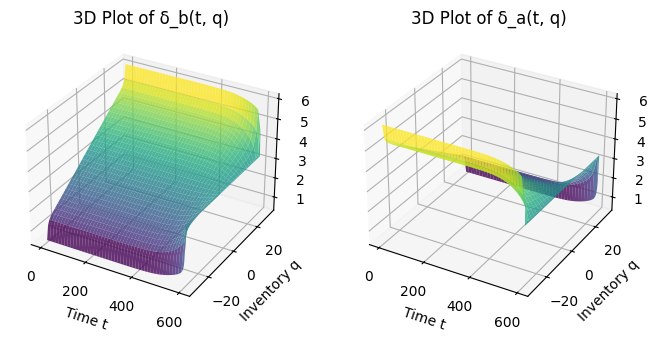

``` python
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

# Plots of bid-ask offsets

# Sample parameters from the original paper
Q = 30 # Hard inventory limit
sigma = 0.3 # Volatility
gamma = 0.01 # Risk aversion parameter
k = 0.3 # Fill probability decay parameter
A = 0.9 # Base (0 offset) fill poisson intensity
T = 600

t_vals = np.linspace(0, T, T+1)
q_vals = np.arange(-Q, Q+1)
t_grid, q_grid = np.meshgrid(t_vals, q_vals, indexing="ij") # Grid values (x,y)

alpha = (k/2) * gamma * (sigma ** 2) # Alpha 
eta = A * (1 + gamma/k) ** (-(1 + k/gamma)) # Eta

M_diag = np.diag(alpha * np.arange(-Q, Q+1) ** 2)
M_off_diags = np.zeros((2*Q+1, 2*Q+1))
np.fill_diagonal(M_off_diags[1:, :], -eta)
np.fill_diagonal(M_off_diags[:, 1:], -eta)
M = M_diag + M_off_diags # Matrix M

# Family of positive functions f_q
f_vals = np.zeros((len(t_vals), len(q_vals)))
ones_vec = np.ones(2*Q+1)
for i, t in enumerate(t_vals):
    f_vals[i, :] = expm(-M*(T - t)) @ ones_vec

# Compute delta_b and delta_a from f_vals
delta_b_vals = (1/k) * np.log(f_vals[:, :-1] / f_vals[:, 1:]) + (1/gamma) * np.log(1 + gamma/k) # f_q/f_(q+1)
delta_a_vals = (1/k) * np.log(f_vals[:, 1:] / f_vals[:, :-1]) + (1/gamma) * np.log(1 + gamma/k) # f_q/f_(q-1)

delta_b_grid = np.zeros_like(t_grid, dtype=float)
delta_b_grid[:, :-1] = delta_b_vals # -Q <= q < Q
delta_b_grid[:,-1] = np.nan # Boundary condition q != Q

delta_a_grid = np.zeros_like(t_grid, dtype=float)
delta_a_grid[:, 1:] = delta_a_vals # -Q < q <= Q
delta_a_grid[:,0] = np.nan # Boundary condition q != -Q


# 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(121, projection='3d') # Plot positioning: x=1, y=2, z=1
ax.plot_surface(t_grid, q_grid, delta_b_grid, cmap="viridis", alpha=0.8)
ax.set_xlabel("Time t")
ax.set_ylabel("Inventory q")
ax.set_title("Plot of δ_b(t, q) against t and q")

ax = fig.add_subplot(122, projection='3d') # Plot positioning: x=1, y=2, z=2
ax.plot_surface(t_grid, q_grid, delta_a_grid, cmap="viridis", alpha=0.8)
ax.set_xlabel("Time t")
ax.set_ylabel("Inventory q")
ax.set_title("Plot of δ_a(t, q) against t and q")

plt.show()
```

### Sidenote:
The original paper shows some close-form formulas for extension problems including the quotes as time tends to infinity, considering price paths with drift, incorporating basic price impact and also explores dependence of the model's values on the different parameters. 

Many ideas can be added to/modified in the Avellaneda stoikov model to incorporate more accurate market dynamics, from modifying the underlying jumps  to be non markov, incorporating memory into fill probabilities, trading fees, etc. However with more variables comes the curse of dimensionality, making traditional numerical methods slow and inaccurate, which is typically tackled by looking at analytic simplifications, machine learning, or more advanced numerical methods.

# Example extension 1: Market making with constant drift [[src](https://arxiv.org/pdf/1105.3115)]
### State process and control
Consider now that the price process has a constant drift $\mu$.
\begin{array}{rl}
Z_t &= (X_t,q_t,S_t) \\\\
dS_t &= \mu dt + \sigma dW_t \\\\
dq_t &= dN_t^b - dN_t^a, q_t\in[-Q,Q] \\\\
dX_t &= S_t^adN_t^a - S_t^bdN_t^b
\end{array}

The control process stays the same, $u_t=(\delta_t^b,\delta_t^a)$. 

### Objective to DPP to HJB
Cost/Objective functional and value function:
\begin{array}{rl}
J(Z_t,u_t) &= \mathbb{E}[-e^{-\gamma(X_T+q_TS_T)}] \\\\
v(t,z) &= \sup_{u_t}\mathbb{E}[-e^{\gamma(X_T+q_TS_T)}]
\end{array}

DPP to HJB:
\begin{array}{rl}
v(t,z) &= \displaystyle \sup_{u_t}\mathbb{E}[v(t+\Delta t, Z_{t+\Delta t})|Z_t = z] \\\\
\mathbb{E}[v(t+\Delta t, Z_{t+\Delta t})|Z_t = z] &= (1-(\lambda_t^a+\lambda_t^b)\Delta t)\mathbb{E}[v(t+\Delta t,X_t,q_t, S_{t+\Delta t})] \\\\
& \displaystyle + v(t,X_t + (S_t+\delta^a_t), q_t - 1,S_t)\lambda_t^a\Delta t \\\\
& \displaystyle + v(t,X_t - (S_t-\delta^b_t), q_t + 1,S_t)\lambda_t^b\Delta t + o(\Delta t) \\\\
v(t+\Delta t,X_t,q_t, S_{t+\Delta t}) &= v(t,z) + \partial_tv(t,z)\Delta t + \partial_s v(t,z) \Delta S + \frac{1}{2}\partial^2_{ss}v(t,z)(\Delta S)^2 + o(\Delta t) \\\\
\implies \mathbb{E}[v(t+\Delta t, Z_{t+\Delta t})|Z_t = z] &=\displaystyle  v(t,z) + \partial_t v(t,z)\Delta t + \mu \partial_s v(t,z) \Delta t + \frac{1}{2}\sigma^2\partial^2_{ss}v(t,z) \Delta t \\\\
& \displaystyle + v(t,X_t + (S_t+\delta^a_t), q_t - 1,S_t)\lambda_t^a\Delta t \\\\
& \displaystyle + v(t,X_t - (S_t-\delta^b_t), q_t + 1,S_t)\lambda_t^b\Delta t + o(\Delta t) \\\\
\therefore 0 &= \partial_tv(t,z) + \mu\partial_sv(t,z) + \frac{\sigma^2}{2}\partial^2_{ss}v(t,z) \\\\
& \displaystyle + \sup_{\delta^b_t}\Lambda^b(\delta^b_t)(v(t,z_b)-v(t,z)) + \sup_{\delta^a_t}\Lambda^a(\delta^a_t)(v(t,z_a) - v(t,z)) \text{ (HJB)}
\end{array}

### Solving HJB

Consider positive functions $(f_q)_{|q|\leq Q}$ such that they satisfy the linear ODEs
\begin{array}{rl}
f_q'(t) &= \begin{cases}
(\alpha q^2-\beta q)f_q(t) - \eta(f_{q-1}(t) + f_{q+1}(t)) & |q|< Q \\\\
(\alpha Q^2-\beta Q)f_Q(t) - \eta f_{Q-1}(t) & q=Q \\\\
(\alpha Q^2+\beta Q)f_{-Q}(t) - \eta f_{-Q+1}(t) & q=-Q
\end{cases}
\end{array}
where $\alpha=\frac{k}{2}\gamma\sigma^2,\beta=k\mu$ and $\eta=A(1+\frac{\gamma}{k})^{-(1+\frac{k}{\gamma})}$. We also have terminal/boundary condiition $\forall q, f_q(T)=1$.

Now consider the Ansatz $v(t,z) = -e^{-\gamma(x+qs)}f_q(t)^{\frac{-\gamma}{k}}$. Similar matrix exponent algebra as in the standard Avandella stoikov model will show that it satisfies the HJB and gives the optimal quotes:
\begin{array}{rl}
\delta^{a*}_t(q) &= \displaystyle \frac{1}{k}\ln{(\frac{f_q(t)}{f_{q+1}(t)})} + \frac{1}{\gamma}\ln{(1+\frac{\gamma}{k})} \\\\
\delta^{a*}_t(q) &= \displaystyle\frac{1}{k}\ln{(\frac{f_q(t)}{f_{q-1}(t)})}+ \frac{1}{\gamma}\ln{(1+\frac{\gamma}{k})}
\end{array}

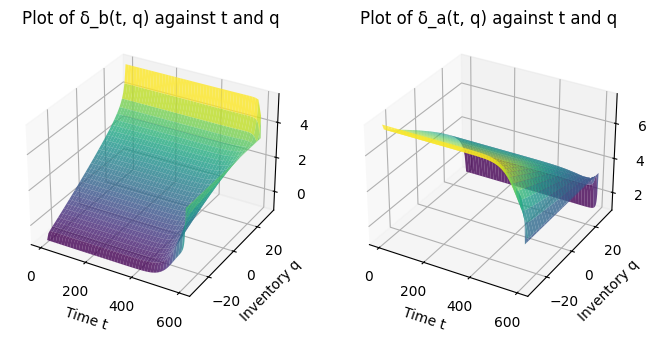

As expected, the offset for the asks differ compared to those of the bids due to the drift. Intuitively, with positive drift ask offsets would be higher while with negative drift bid offsets would be higher.

```python
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

# Plots of bid-ask offsets

# Sample parameters from the original paper
Q = 30 # Hard inventory limit
sigma = 0.3 # Volatility
gamma = 0.01 # Risk aversion parameter
k = 0.3 # Fill probability decay parameter
A = 0.9 # Base (0 offset) fill poisson intensity
T = 600
mu = 0.03 # Drift

t_vals = np.linspace(0, T, T+1)
q_vals = np.arange(-Q, Q+1)
t_grid, q_grid = np.meshgrid(t_vals, q_vals, indexing="ij") # Grid values (x,y)

alpha = (k/2) * gamma * (sigma ** 2) # Alpha 
eta = A * (1 + gamma/k) ** (-(1 + k/gamma)) # Eta
beta = k*mu # Beta

M_diag = np.diag(alpha * np.arange(-Q, Q+1) ** 2-beta * np.arange(-Q,Q+1))
M_off_diags = np.zeros((2*Q+1, 2*Q+1))
np.fill_diagonal(M_off_diags[1:, :], -eta)
np.fill_diagonal(M_off_diags[:, 1:], -eta)
M = M_diag + M_off_diags # Matrix M

# Family of positive functions f_q
f_vals = np.zeros((len(t_vals), len(q_vals)))
ones_vec = np.ones(2*Q+1)
for i, t in enumerate(t_vals):
    f_vals[i, :] = expm(-M*(T - t)) @ ones_vec

# Compute delta_b and delta_a from f_vals
delta_b_vals = (1/k) * np.log(f_vals[:, :-1] / f_vals[:, 1:]) + (1/gamma) * np.log(1 + gamma/k) # f_q/f_(q+1)
delta_a_vals = (1/k) * np.log(f_vals[:, 1:] / f_vals[:, :-1]) + (1/gamma) * np.log(1 + gamma/k) # f_q/f_(q-1)

delta_b_grid = np.zeros_like(t_grid, dtype=float)
delta_b_grid[:, :-1] = delta_b_vals # -Q <= q < Q
delta_b_grid[:,-1] = np.nan # Boundary condition q != Q

delta_a_grid = np.zeros_like(t_grid, dtype=float)
delta_a_grid[:, 1:] = delta_a_vals # -Q < q <= Q
delta_a_grid[:,0] = np.nan # Boundary condition q != -Q


# 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(121, projection='3d') # Plot positioning: x=1, y=2, z=1
ax.plot_surface(t_grid, q_grid, delta_b_grid, cmap="viridis", alpha=0.8)
ax.set_xlabel("Time t")
ax.set_ylabel("Inventory q")
ax.set_title("Plot of δ_b(t, q) against t and q")

ax = fig.add_subplot(122, projection='3d') # Plot positioning: x=1, y=2, z=2
ax.plot_surface(t_grid, q_grid, delta_a_grid, cmap="viridis", alpha=0.8)
ax.set_xlabel("Time t")
ax.set_ylabel("Inventory q")
ax.set_title("Plot of δ_a(t, q) against t and q")

plt.show()
```


# Example extension 2: Market-making with impact [[src](https://arxiv.org/pdf/1105.3115)]
In this example, we consider the idea that market orders have an impact on the price process, where if the MM's bid is filled the market moves down while if the MM's ask is filled the market moves up.

### State process
The state process follows
\begin{array}{rl}
Z_t &= (X_t,q_t,S_t) \\\\
dS_t &= \sigma dW_t + \xi dN_t^a -\xi dN_t^b\\\\
dq_t &= dN_t^b - dN_t^a, q_t\in[-Q,Q] \\\\
dX_t &= S_t^adN_t^a - S_t^bdN_t^b
\end{array}
where $\xi$ is a constant representing the MM's constant size liimit orders.

The control process stays the same, $u_t=(\delta_t^b,\delta_t^a)$. 

### Objective to DPP to HJB
Cost/Objective functional and value function:
\begin{array}{rl}
J(Z_t,u_t) &= \mathbb{E}[-e^{-\gamma(X_T+q_TS_T)}] \\\\
v(t,z) &= \sup_{u_t}\mathbb{E}[-e^{\gamma(X_T+q_TS_T)}]
\end{array}

DPP to HJB:
\begin{array}{rl}
v(t,z) &= \displaystyle \sup_{u_t}\mathbb{E}[v(t+\Delta t, Z_{t+\Delta t})|Z_t = z] \\\\
\mathbb{E}[v(t+\Delta t, Z_{t+\Delta t})|Z_t = z] &= (1-(\lambda_t^a+\lambda_t^b)\Delta t)\mathbb{E}[v(t+\Delta t,X_t,q_t, S_{t+\Delta t})] \\\\
& \displaystyle + v(t,X_t + (S_t+\delta^a_t), q_t - 1,S_t)\lambda_t^a\Delta t \\\\
& \displaystyle + v(t,X_t - (S_t-\delta^b_t), q_t + 1,S_t)\lambda_t^b\Delta t + o(\Delta t) \\\\
v(t+\Delta t,X_t,q_t, S_{t+\Delta t}) &= v(t,z) + \partial_tv(t,z)\Delta t + \partial_s v(t,z) \Delta S + \frac{1}{2}\partial^2_{ss}v(t,z)(\Delta S)^2 + o(\Delta t) \\\\
\implies \mathbb{E}[v(t+\Delta t, Z_{t+\Delta t})|Z_t = z] &=\displaystyle  v(t,z) + \partial_t v(t,z)\Delta t + \frac{1}{2}\sigma^2\partial^2_{ss}v(t,z) \Delta t \\\\
& \displaystyle + v(t,X_t + (S_t+\delta^a_t), q_t - 1,S_t + \xi)\lambda_t^a\Delta t \\\\
& \displaystyle + v(t,X_t - (S_t-\delta^b_t), q_t + 1,S_t - \xi)\lambda_t^b\Delta t + o(\Delta t) \\\\
\therefore 0 &= \partial_tv(t,z) + \frac{\sigma^2}{2}\partial^2_{ss}v(t,z) \\\\
& \displaystyle + \sup_{\delta^b_t}\Lambda^b(\delta^b_t)(v(t,z_b)-v(t,z)) + \sup_{\delta^a_t}\Lambda^a(\delta^a_t)(v(t,z_a) - v(t,z)) \text{ (HJB)}
\end{array}
where $z_b=(X_t - (S_t-\delta^b_t), q_t + 1,S_t - \xi)$ and $z_a=(X_t + (S_t+\delta^a_t), q_t - 1,S_t + \xi)$.

### Solution of HJB
Consider positive functions $(f_q)_{|q|\leq Q}$ such that they satisfy the linear ODEs
\begin{array}{rl}
f_q'(t) &= \begin{cases}
\alpha q^2f_q(t) - \eta e^{-\frac{k}{2}\xi}(f_{q-1}(t) + f_{q+1}(t)) & |q|< Q \\\\
\alpha Q^2f_Q(t) - \eta e^{-\frac{k}{2}\xi}f_{Q-1}(t) & q=Q \\\\
\alpha Q^2f_{-Q}(t) - \eta e^{-\frac{k}{2}\xi}f_{-Q+1}(t) & q=-Q
\end{cases}
\end{array}
We have terminal/boundary condiition $\forall q, f_q(T)=e^{-\frac{1}{2}k\xi q^2}$.

We take the ansatz for the value function to be $v(t,z) = -e^{\gamma(x+qs +\frac{1}{2}\xi q^2)}f_q(t)^{\frac{-\gamma}{k}}$. From here, using the same matrix exponential as before, the optimal quotes can be derived:
\begin{array}{rl}
\delta^{b*}_t(q) = \frac{1}{k}\ln{(\frac{f_q(t)}{f_{q+1}(t)})} + \frac{\xi}{2} + \frac{1}{\gamma}\ln{(1+\frac{\gamma}{k})}
\delta^{a*}_t(q) = \frac{1}{k}\ln{(\frac{f_q(t)}{f_{q-1}(t)})} + \frac{\xi}{2} + \frac{1}{\gamma}\ln{(1+\frac{\gamma}{k})}
\end{array}

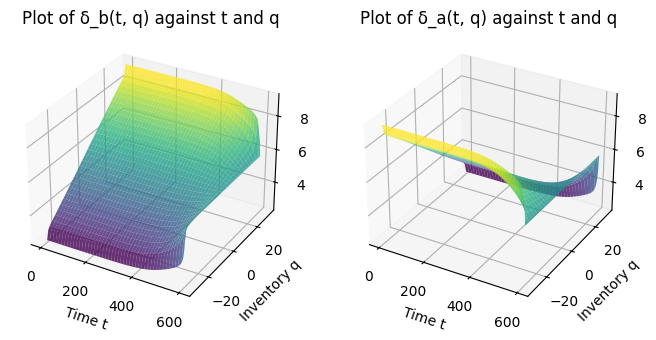

The impact of adding in price impact is that it acts like a basic version of adverse selection. The base effect is that it widens the offsets for both the bids and asks. However besides this, when say the inventory is out of balance, the price impact amplifies the shift in quotes.

```python
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

# Plots of bid-ask offsets

# Sample parameters from the original paper
Q = 30 # Hard inventory limit
sigma = 0.3 # Volatility
gamma = 0.01 # Risk aversion parameter
k = 0.3 # Fill probability decay parameter
A = 0.9 # Base (0 offset) fill poisson intensity
T = 600
xi = 5 # Market impact

t_vals = np.linspace(0, T, T+1)
q_vals = np.arange(-Q, Q+1)
t_grid, q_grid = np.meshgrid(t_vals, q_vals, indexing="ij") # Grid values (x,y)

alpha = (k/2) * gamma * (sigma ** 2) # Alpha 
eta = A * (1 + gamma/k) ** (-(1 + k/gamma)) # Eta

M_diag = np.diag(alpha * np.arange(-Q, Q+1) ** 2)
M_off_diags = np.zeros((2*Q+1, 2*Q+1))
np.fill_diagonal(M_off_diags[1:, :], -eta*np.exp(-k/2*xi))
np.fill_diagonal(M_off_diags[:, 1:], -eta*np.exp(-k/2*xi))
M = M_diag + M_off_diags # Matrix M

# Family of positive functions f_q
f_vals = np.zeros((len(t_vals), len(q_vals)))
ones_vec = np.ones(2*Q+1)
for i, t in enumerate(t_vals):
    f_vals[i, :] = expm(-M*(T - t)) @ ones_vec

# Compute delta_b and delta_a from f_vals
delta_b_vals = (1/k) * np.log(f_vals[:, :-1] / f_vals[:, 1:]) + xi/2 + (1/gamma) * np.log(1 + gamma/k) # f_q/f_(q+1)
delta_a_vals = (1/k) * np.log(f_vals[:, 1:] / f_vals[:, :-1]) + xi/2 + (1/gamma) * np.log(1 + gamma/k) # f_q/f_(q-1)

delta_b_grid = np.zeros_like(t_grid, dtype=float)
delta_b_grid[:, :-1] = delta_b_vals # -Q <= q < Q
delta_b_grid[:,-1] = np.nan # Boundary condition q != Q

delta_a_grid = np.zeros_like(t_grid, dtype=float)
delta_a_grid[:, 1:] = delta_a_vals # -Q < q <= Q
delta_a_grid[:,0] = np.nan # Boundary condition q != -Q


# 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(121, projection='3d') # Plot positioning: x=1, y=2, z=1
ax.plot_surface(t_grid, q_grid, delta_b_grid, cmap="viridis", alpha=0.8)
ax.set_xlabel("Time t")
ax.set_ylabel("Inventory q")
ax.set_title("Plot of δ_b(t, q) against t and q")

ax = fig.add_subplot(122, projection='3d') # Plot positioning: x=1, y=2, z=2
ax.plot_surface(t_grid, q_grid, delta_a_grid, cmap="viridis", alpha=0.8)
ax.set_xlabel("Time t")
ax.set_ylabel("Inventory q")
ax.set_title("Plot of δ_a(t, q) against t and q")

plt.show()
```


# Extensions
### Mathematics/Stats areas
#### Proofs of existence, uniqueness and stability using Viscosity solutions
#### Infinite activity levy processes
#### Mean-field control 
#### Numerical analysis
#### Dimensionality reduction techniques
#### Deep reinforcement learning

### Papers that are on market-making/Finance
#### Market-making with hawkes-driven order arrivals [[src](https://oxford-man.ox.ac.uk/wp-content/uploads/2020/05/Algorithmic-Trading-Stochastic-Control-and-Mutually-Exciting-Processes.pdf)]
#### Multi-asset market making [[src](https://arxiv.org/pdf/1810.04383)]
#### Adverse selection and intensity modelling [[src](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1964781)]
#### Nonlinear price impact models[[src]()]
#### Rebate farming [[src](https://arxiv.org/pdf/2501.12591)]
#### Improving fill probability modelling [[src](https://arxiv.org/abs/2407.16527)]
#### Incorporating resting times/cooldown [[src](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3192844)]
#### Custom alpha signal [[src](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3439440)]
#### Incorporating latency [[src](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3433739)]
#### Queue position modelling [[src](https://arxiv.org/pdf/1312.0563)]
#### Market making for options [[src](https://arxiv.org/pdf/1907.12433)]
#### Market making with built in uncertainty [[src](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2310645)]